*`0_test-installation.ipynb` notebook*


A.L. (MMIV-ML) 20211012 

# Python, Numpy, Pandas, Matplotlib, Nibabel and more

If you're able to successfully run through this notebook then you're good to go.

## How to use Jupyter Notebook?

[Jupyter Notebook](http://jupyter.org/) is a convenient tool for experimenting with code. All text and code is written in HTML, Markdown and Python.

Use the arrow keys to navigate between cells. Press ENTER on a cell to enter edit mode. ESC to go back. (Try it now!)

In [1]:
print("This is a Jupyter cell containing Python code. Hit 'Run' in the menu to run the cell. ")

This is a Jupyter cell containing Python code. Hit 'Run' in the menu to run the cell. 


You can also run cells using **Shift+Enter** and **Ctrl+Enter**. Try running the above cell using both of these. 

Use the Help menu for more information.

In KidneySegm we will use Notebook for most of our coding. You'll get good Notebook skills after a while. Here's a nice tutorial on Jupyter Notebook that I recommend that you at least skim through: [Jupyter Notebook Tutorial: The Definitive Guide](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook).

### Exercise
- Experiment with *Tab completion* and *tooltips* in Jupyter
- Read about Jupyter *magic commands*.

Hint: Google. Or have a look <a href="http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.2/cookbook/A%20quick%20tour%20of%20IPython%20Notebook.ipynb">here</a>.

# Import libraries

These are libraries we'll use frequently:

In [2]:
# To display plots directly in notebooks:
%matplotlib inline

In [3]:
# A commonly used plotting library:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# An extension of matplotlib that can generate even nicer plots:
import seaborn as sns

In [5]:
# A library for efficient manipulation of matrices (and more):
import numpy as np

In [6]:
# To read, write and process tabular data:
import pandas as pd

In [7]:
# For machine learning:
import sklearn

In [8]:
# For medical imaging (neuro-imaging):
import nibabel

In [9]:
# Machine learning for Neuro-Imaging
import nilearn

In [10]:
# A library for statistics in python
import statsmodels

In [11]:
# A library for simage processing in python
import skimage

In [12]:
# Library for reading and writing a wide range of 
#  image, video, scientific, and volumetric data formats
import imageio

# Test libraries

**NB:** The purpose of the following is to test your installation. Don't worry if things don't make much sense to you right now. It'll all become familiar during the course.

## `Numpy`

In [13]:
import numpy as np

In [14]:
a = np.array([1, 2, 3])
print(type(a))

<class 'numpy.ndarray'>


In [15]:
e = np.random.random((3,3))
e

array([[0.29706933, 0.59463823, 0.32726069],
       [0.18197889, 0.63278428, 0.41758982],
       [0.10784628, 0.77793557, 0.94153132]])

## `matplotlib`: a simple plot 

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

This should result in a figure displaying a sine function.

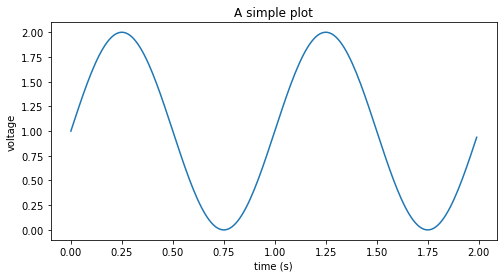

In [17]:
# Data to be plotted (generated using Numpy)
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Create a figure of a certain size
f = plt.figure(figsize=(8,4))

# Plot t versus s
plt.plot(t, s)

# Add title and labels:
plt.title('A simple plot')
plt.xlabel('time (s)')
plt.ylabel('voltage')

# Vis plot:
plt.show()

## `Seaborn`: a more advanced plot

In [18]:
import seaborn as sns

Source: [Link](https://seaborn.pydata.org/examples/scatterplot_categorical.html)

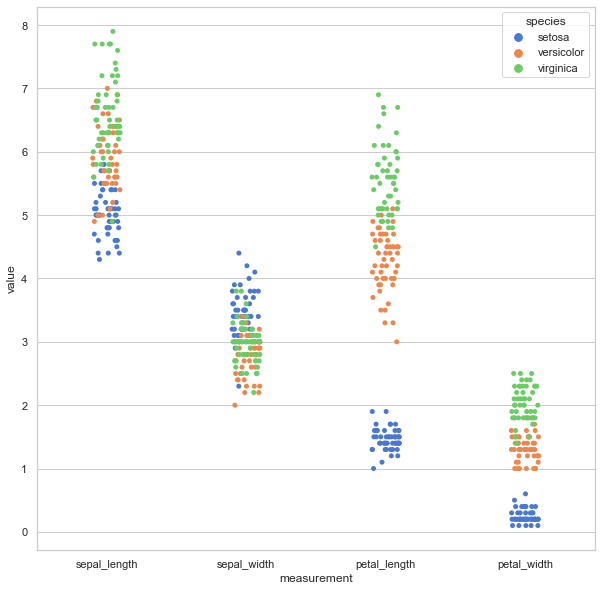

In [19]:
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Set up figure
f, ax = plt.subplots(figsize=(10,10))

# Draw a categorical scatterplot to show each observation
#sns.swarmplot(x="measurement", y="value", hue="species", data=iris, size=5, ax=ax)
sns.stripplot(x="measurement", y="value", hue="species", data=iris, size=5, ax=ax)

plt.show()

## `Pandas`

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('./test-data/0_test-data.csv')

In [22]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


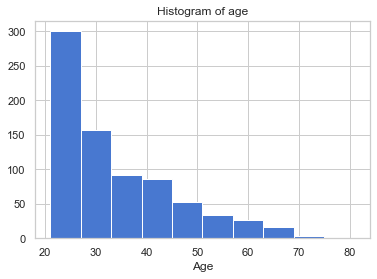

In [23]:
df['age'].hist()
plt.title("Histogram of age")
plt.xlabel("Age")
plt.show()

## `scikit-learn`: machine learning

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
data = datasets.load_breast_cancer()

In [26]:
X = data['data']
y = data['target']
features = data['feature_names']
labels = data['target_names']

In [27]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [28]:
print(labels)

['malignant' 'benign']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
rf = RandomForestClassifier(n_estimators=100)

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
predictions = rf.predict(X_test)

In [33]:
accuracy_score(y_test, predictions) * 100

96.5034965034965

## `NiBabel` and `Nilearn`: Neuroimaging in Python

In [34]:
import nibabel as nib

In [35]:
img = nib.load('./test-data/0_test-nifti.nii.gz')

In [36]:
img.shape

(256, 256, 150)

In [37]:
from nibabel.viewers import OrthoSlicer3D

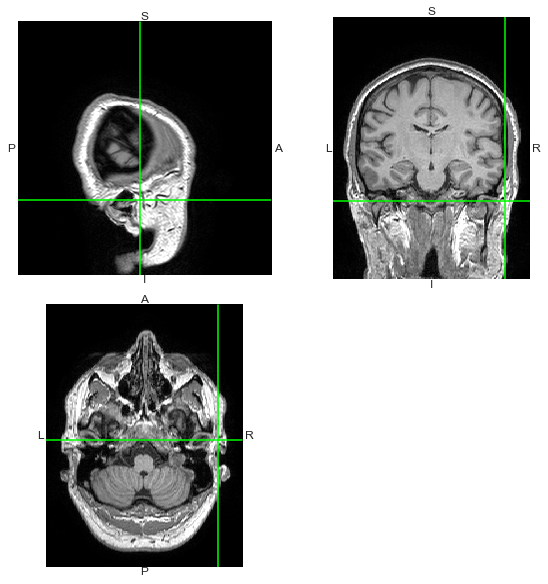

In [38]:
OrthoSlicer3D(img.get_fdata(), affine= img.affine).show()

In [39]:
# To ignore an unimportant warning generated by the below code 
# (remove the filter if you're curious)
import warnings 
warnings.simplefilter('ignore')

## `Statsmodels`: Statistics in Python

In [40]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Load data 
# (Table 6.3 in Dobson & Barnett, An Introduction to Generalized Linear Models, 2018, p.105)
carbohydrate = pd.read_csv('./test-data/carbohydrate_diet_dobson_tab_6_3.csv')
print(carbohydrate.info())
carbohydrate.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   carbohydrate  20 non-null     int64
 1   age           20 non-null     int64
 2   weight        20 non-null     int64
 3   protein       20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None


,carbohydrate,age,weight,protein
0,33,33,100,14
1,40,47,92,15
2,37,49,135,18
3,27,35,144,12
4,30,46,140,15


In [41]:
# Fit ordinary least squares regression model
model = 'carbohydrate~age+weight+protein'
model_fit = smf.ols(model, data=carbohydrate).fit()
# Inspect the results
print(model)
model_fit.summary2()

carbohydrate~age+weight+protein


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.383   
Dependent Variable: carbohydrate     AIC:                131.6734
Date:               2021-10-12 16:27 BIC:                135.6564
No. Observations:   20               Log-Likelihood:     -61.837 
Df Model:           3                F-statistic:        4.934   
Df Residuals:       16               Prob (F-statistic): 0.0130  
R-squared:          0.481            Scale:              35.479  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     36.9601   13.0713   2.8276  0.0121   9.2502  64.6699
age           -0.1137    0.1093  -1.0398  0.3139  -0.3454   0.1181
weight        -0.2280    0.0833  -2.7377  0.0146  -0.4046  -0.0515
protein        1.9577    0.6349   3.0835  0.0071   0.6118   3.3036
-----------------------------------------------------------------
Omnibus:               2.146        Durbin-Watson:          1.875
Prob(Omnibus):         0.342        Jarque-Bera (JB):       1.425
Skew:                  -0.417       Prob(JB):               0.490
Kurtosis:              1.993        Condition No.:          1198 
=================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [42]:
print('Diagnostics for model:', model)

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

pd.DataFrame({'Carbohydrate': carbohydrate['carbohydrate'],  
              'Fitted value': model_fit.fittedvalues, 
              'Residual': model_fit.resid,
              'Std_residual': model_norm_residuals}).round(4).head(20)

Diagnostics for model: carbohydrate~age+weight+protein


,Carbohydrate,Fitted value,Residual,Std_residual
0,33,37.8150,-4.8150,-0.8756
1,40,40.0054,-0.0054,-0.0010
2,37,35.8464,1.1536,0.2155
3,27,23.6394,3.3606,0.7936
4,30,29.1742,0.8258,0.1590
5,43,37.3848,5.6152,0.9866
6,34,35.6584,-1.6584,-0.3161
7,48,44.5969,3.4031,0.6811
8,30,40.3424,-10.3424,-1.8828
9,38,35.6518,2.3482,0.4139


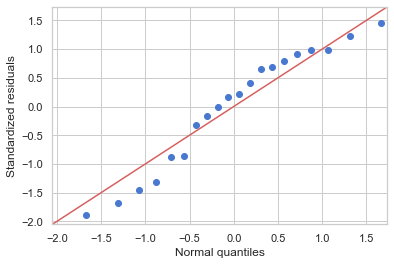

In [43]:
# A diagnostic QQ-plot for the OLS model
# https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
# Cf. Fig. 6.1 in Dobson & Barnett, 2018

QQ = sm.ProbPlot(model_norm_residuals, scale=1, )
QQ.qqplot(xlabel='Normal quantiles', ylabel='Standardized residuals', line='45')
plt.show()

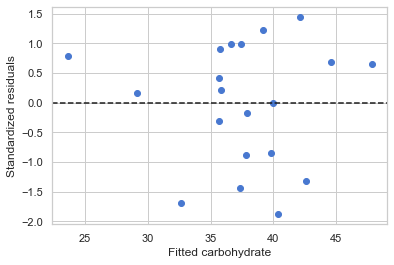

In [44]:
# A diagnostic plot for the OLS model
# https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
# Cf. Fig. 6.1 in Dobson & Barnett, 2018
fig, ax = plt.subplots()
plt.plot(model_fit.fittedvalues, model_norm_residuals, 'o')
plt.axhline(y=.0, color='k', linestyle='--')
ax.set_xlabel('Fitted carbohydrate')
# plt.xticks(np.arange(0, carbohydrate.shape[0], step=5))
ax.set_ylabel('Standardized residuals')
plt.show()

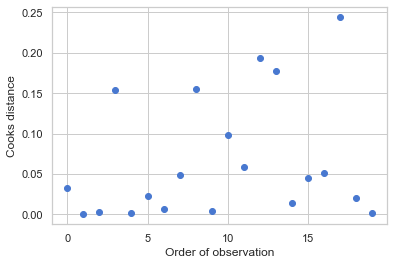

In [45]:
# Cook's distance - https://en.wikipedia.org/wiki/Cook%27s_distance
# A measure of influential observations (those that have relatively large effect 
# on inferences based on the model) obtained from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]
# Cf. Fig. 6.1 in Dobson & Barnett, 2018
fig, ax = plt.subplots()
plt.plot(model_cooks, 'o')
ax.set_xlabel('Order of observation')
plt.xticks(np.arange(0, carbohydrate.shape[0], step=5))
ax.set_ylabel('Cook''s distance')
plt.show()

## `scikit-image`: Image processing in Python


*Example from scikit-image.org homepage*<br>
**Immunohistochemical staining colors separation**

Color deconvolution consists of the separation of features by their colors.

In this example we separate the immunohistochemical (IHC) staining from the hematoxylin counterstaining. The separation is achieved with the method described in [1], known as “color deconvolution”.

The IHC staining expression of the FHL2 protein is here revealed with Diaminobenzidine (DAB) which gives a brown color.

[1]	A. C. Ruifrok and D. A. Johnston, “Quantification of histochemical staining by color deconvolution.,” Analytical and quantitative cytology and histology / the International Academy of Cytology and American Society of Cytology, vol. 23, no. 4, pp. 291-9, Aug. 2001.

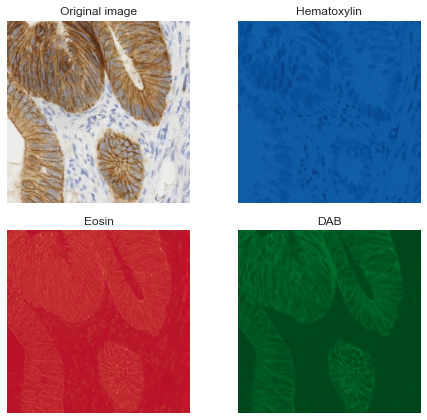

In [46]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the original one
#cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
#cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white', 'saddlebrown'])
#cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet', 'white'])

ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap = 'Blues') # , cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap = "coolwarm") # , cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap = "Greens_r") # , cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

**Now we can easily manipulate the hematoxylin and DAB “channels”:**

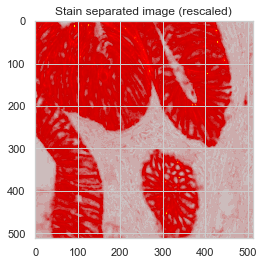

In [47]:
import numpy as np
from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

fig, ax = plt.subplots()
ax.imshow(zdh[:,:,1], cmap='nipy_spectral_r')
ax.set_title("Stain separated image (rescaled)")
#ax.axis('off')
plt.show()

## `imageio` : Python library for reading and writing image data

Reading single slice 4 channel MR images in DICOM format

In [48]:
import imageio

chns = ['FLASH', 'DESS', 'FISP', 'PSIF']
nchn = len(chns)
for c in range(len(chns)):
    cmd = 'im%d = imageio.imread("./test-data/%s_060.dcm")' % (c+1, chns[c].lower())
    print(cmd)
    exec(cmd)

im1 = imageio.imread("./test-data/flash_060.dcm")
im2 = imageio.imread("./test-data/dess_060.dcm")
im3 = imageio.imread("./test-data/fisp_060.dcm")
im4 = imageio.imread("./test-data/psif_060.dcm")


In [49]:
nrow, ncol = im1.shape
vox_size = [im1.meta.PixelSpacing[0], im1.meta.PixelSpacing[1], im1.meta.SliceSpacing]

In [50]:
im = np.zeros((nrow, ncol, nchn), dtype=im1.dtype)

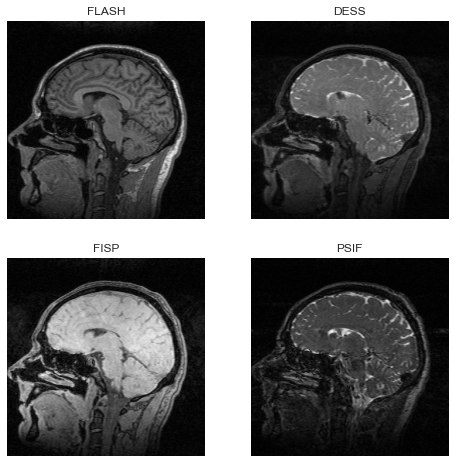

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

for c in range(nchn):
    cmd = 'im[:,:,%d] = im%d.data' % (c, c+1)
    exec(cmd)
    ax[c].imshow(im[:,:,c], cmap='gray')
    ax[c].set_title(chns[c])
    ax[c].axis('off')

plt.show()

(256, 256, 3)


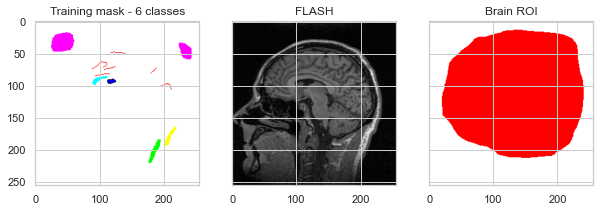

In [52]:
# Classes (color-coded): air, gm, wm, csf, fat, mus(cle)
train_mask = imageio.imread("./test-data/flash_060_training_mask_6cla.png")
roi_mask = imageio.imread("./test-data/flash_060_brain_mask.png")
print(train_mask.shape)

fig, axes = plt.subplots(1, 3, figsize=(10, 16), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(train_mask)
ax[0].set_title("Training mask - 6 classes")
ax[1].imshow(im1, cmap='gray')
ax[1].set_title("FLASH")
ax[2].imshow(roi_mask)
ax[2].set_title("Brain ROI")
plt.show()

In [53]:
# Number of occurences of each unique color (class label in training mask) in descending order
from collections import Counter
Counter([tuple(colors) for i in train_mask for colors in i]).most_common()

[((255, 255, 255), 63519),
 ((255, 0, 255), 1250),
 ((0, 255, 0), 250),
 ((255, 255, 0), 170),
 ((255, 0, 0), 136),
 ((0, 255, 255), 129),
 ((0, 0, 255), 51),
 ((0, 0, 0), 31)]

In [54]:
# Count the number of occurences of oixels in ROI mask
from collections import Counter
Counter([tuple(colors) for i in roi_mask for colors in i]).most_common()

[((255, 0, 0), 35822), ((255, 255, 255), 29714)]

## Reading and exploring  kidney data

In [55]:
T1_1 = nib.load('../notebooks/data/T1_1.nii.gz')
GT_1 = nib.load('../notebooks/data/GT_1.nii.gz')  # Right kidney: 126 Left kidney: 189   Rest: 0

In [56]:
print(f'T1_1.shape: {T1_1.shape}')
print(f'GT_1.shape: {GT_1.shape}')

T1_1.shape: (256, 256, 35)
GT_1.shape: (256, 256, 35)


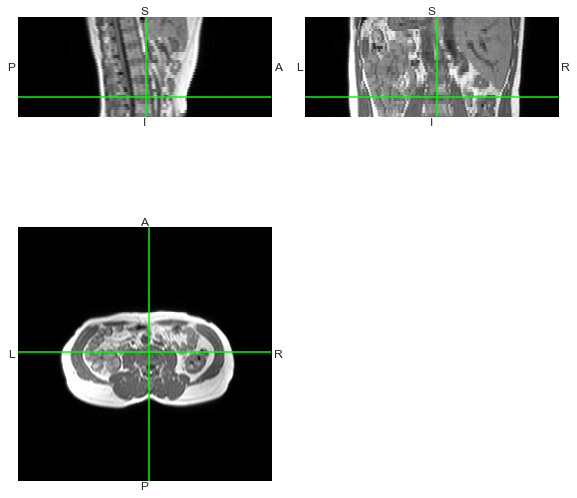

In [57]:
OrthoSlicer3D(T1_1.get_fdata(), affine= T1_1.affine).show()

In [58]:
study = 1
x, y, z = -76, -51, 84  # Ad hoc (RAS coordinates)
chns = ['T1', 'GT']
datadir = '../notebooks/data'

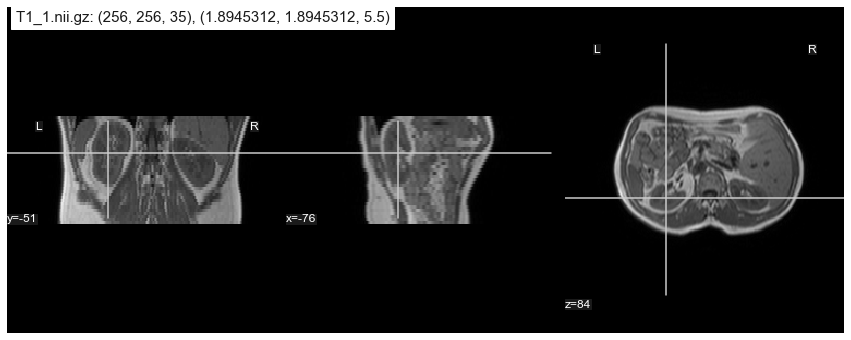

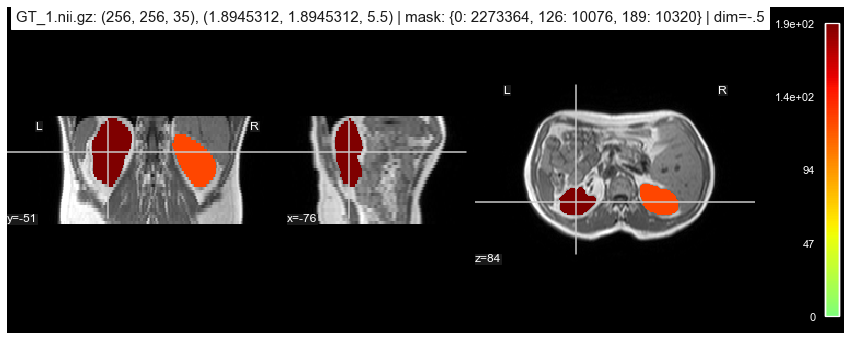

In [59]:
from nilearn import plotting

bckimg = f'{datadir}/T1_1.nii.gz'

for i, chn in enumerate(chns):
    
    fn_inp = f'{datadir}/{chn}_{study}.nii.gz'
    img = nib.load(fn_inp)
    data = img.get_fdata()
    
    fig, ax  = plt.subplots(1, 1, figsize=(15,6))
    title = f'{chn}_{study}.nii.gz: {img.shape}, {img.header.get_zooms()}'
    
    if chn == 'T1':
        plotting.plot_anat(img, axes = ax, title=title, cmap="gray", dim=0, cut_coords = (x, y, z))
    if chn == 'GT':
        (unique, counts) = np.unique(data, return_counts=True)
        vals = f'{dict(zip(unique.astype(int),counts))}'
        # https://nilearn.github.io/auto_examples/01_plotting/plot_colormaps.html
        # https://nilearn.github.io/auto_examples/01_plotting/plot_dim_plotting.html
        plotting.plot_stat_map(img,
                               axes = ax,
                               bg_img=bckimg,
                               cut_coords=(x, y, z),
                               cmap='jet',
                               threshold=0,
                               title=f'{title} | mask: {vals} | dim=-.5',
                               dim=-.5)
        
    plt.show()